https://github.com/databriefing/article-notebooks/blob/master/rossmann/01_predict_sales_part1.ipynb  
https://www.databriefing.com/coding/predict-sales-1/  
https://www.kaggle.com/c/rossmann-store-sales/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#
import time

print ("libraries loaded")

libraries loaded


In [2]:
data = pd.read_csv('./kaggleSalesData/train.csv')
print (data.shape)

(1017209, 9)


D:\DProgramFiles\python3Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [6]:
print(data.StateHoliday.unique())
print(type(data.StateHoliday[0]))

['0' 'a' 'b' 'c' 0]
<class 'str'>


In [7]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html
data.StateHoliday = data.StateHoliday.astype(str)
data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [8]:
print(data.StateHoliday.unique())
print(type(data.StateHoliday[0]))
data.StateHoliday.unique()

['0' 'a' 'b' 'c']
<class 'str'>


array(['0', 'a', 'b', 'c'], dtype=object)

In [9]:
# List the number of unique values for each colum
# Apply the function to each column (axis=0)

def count_unique(column):
    return len(column.unique())

data.apply(count_unique, axis=0).astype(np.int32)

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         4
SchoolHoliday        2
dtype: int32

In [10]:
data.isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [11]:
print(type(data.Date[0]))
print(pd.to_datetime(data.Date[0]))
data['date_formatted']=pd.to_datetime(data.Date)
print(type(data.date_formatted[0]))

<class 'str'>
2015-07-31 00:00:00
<class 'pandas._libs.tslib.Timestamp'>


In [12]:
print (type(data.Date[0]))
print (type(data.Date))
print (data.Date.dtype)
data.describe()

<class 'str'>
<class 'pandas.core.series.Series'>
object


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


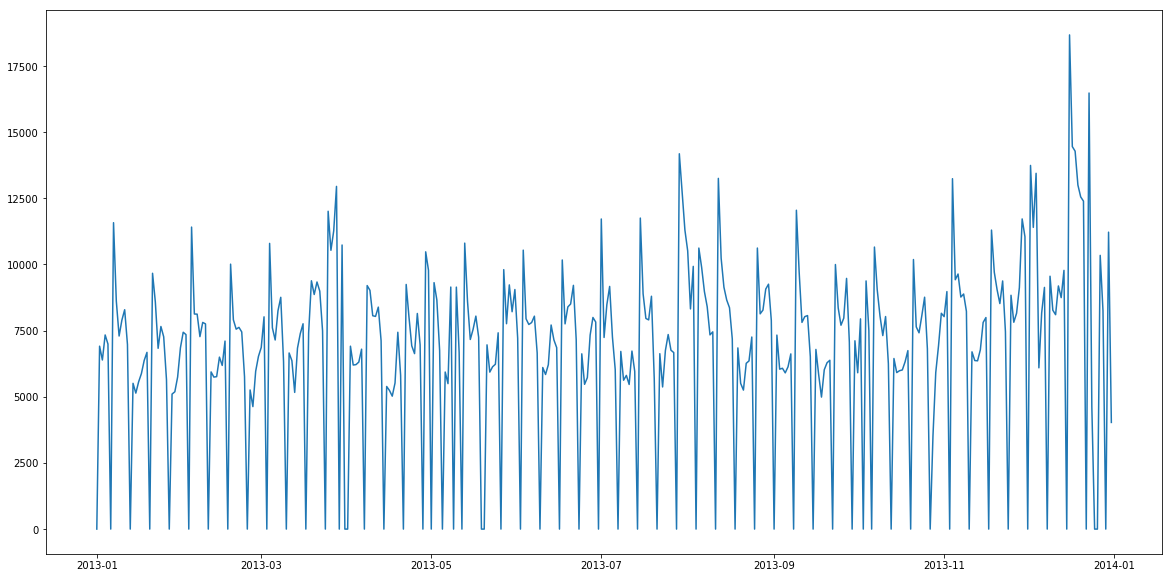

In [13]:
# Filter data for store # 150 and plot sales data for first 365 days
store_data = data[data.Store==150].sort_values('Date')
#NB: dataframe.sort superceded by dataframe.sort_values
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data.date_formatted[:365], store_data.Sales[:365])

In [14]:
print(data.Promo.describe())
print(data.Promo.unique())

count    1.017209e+06
mean     3.815145e-01
std      4.857586e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: Promo, dtype: float64
[1 0]


D:\DProgramFiles\python3Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


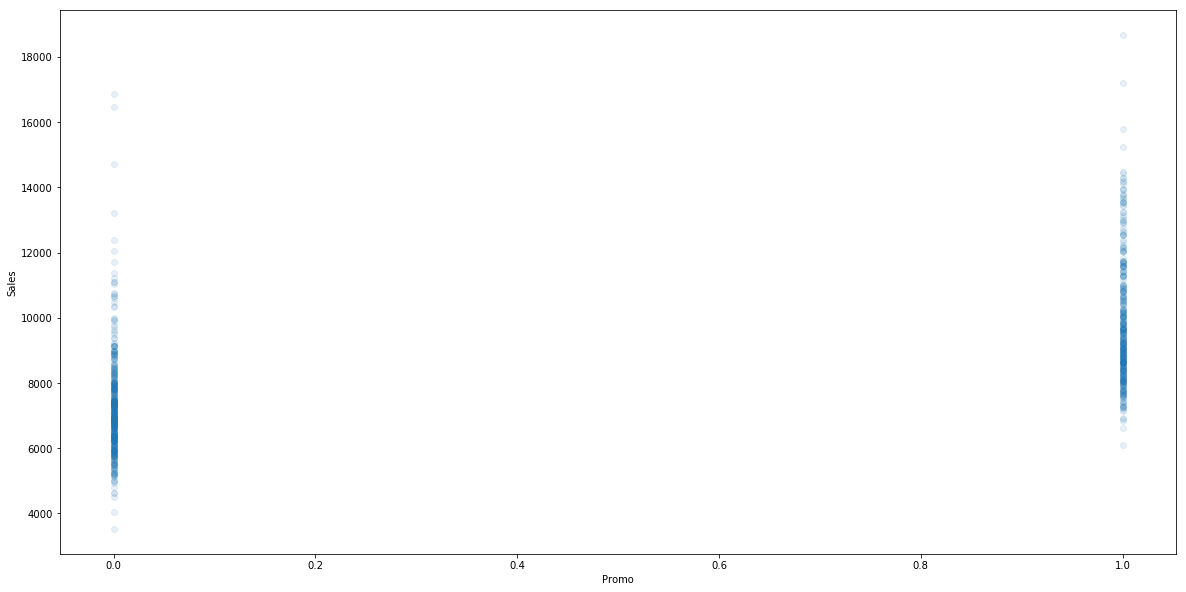

In [15]:
plt.figure(figsize=(20, 10))
#store_data[data.Open==1] = filter rows by stores which are open.
#NB: data.Promo column values are either 0 or 1
plt.scatter(x=store_data[data.Open==1].Promo, y=store_data[data.Open==1].Sales, alpha=0.1)
plt.xlabel('Promo')
plt.ylabel('Sales')

In [16]:
#transformed_data = data.drop(['Store', 'Date', 'Customers'], axis=1)
transformed_data = data.drop(['Store', 'Date', 'Customers', 'date_formatted'], axis=1)

In [17]:
list(transformed_data)

['DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

In [18]:
transformed_data.head()

,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday
0,5,5263,1,1,0,1
1,5,6064,1,1,0,1
2,5,8314,1,1,0,1
3,5,13995,1,1,0,1
4,5,4822,1,1,0,1


In [19]:
print ("data.DayOfWeek:", data.DayOfWeek.unique(), data.DayOfWeek.dtype)
print ("data.StateHoliday:", data.StateHoliday.unique(), data.StateHoliday.dtype)
print ("transformed_data columns = ", list(transformed_data))
print ("transformed_data.dtypes:\n", transformed_data.dtypes)
print (transformed_data.describe())

data.DayOfWeek: [5 4 3 2 1 7 6] int64
data.StateHoliday: ['0' 'a' 'b' 'c'] object
transformed_data columns =  ['DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
transformed_data.dtypes:
 DayOfWeek         int64
Sales             int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object
          DayOfWeek         Sales          Open         Promo  SchoolHoliday
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   1.017209e+06
mean   3.998341e+00  5.773819e+03  8.301067e-01  3.815145e-01   1.786467e-01
std    1.997391e+00  3.849926e+03  3.755392e-01  4.857586e-01   3.830564e-01
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00
25%    2.000000e+00  3.727000e+03  1.000000e+00  0.000000e+00   0.000000e+00
50%    4.000000e+00  5.744000e+03  1.000000e+00  0.000000e+00   0.000000e+00
75%    6.000000e+00  7.856000e+03  1.000000e+00  1.000000e+00   0.000000e+00
max    7.000000e+

In [20]:
transformed_data = pd.get_dummies(transformed_data, columns=['DayOfWeek', 'StateHoliday'])
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
#Convert categorical variable into dummy/indicator variables
print (list(transformed_data))
print (transformed_data.dtypes)
print (transformed_data.describe())

['Sales', 'Open', 'Promo', 'SchoolHoliday', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c']
Sales             int64
Open              int64
Promo             int64
SchoolHoliday     int64
DayOfWeek_1       uint8
DayOfWeek_2       uint8
DayOfWeek_3       uint8
DayOfWeek_4       uint8
DayOfWeek_5       uint8
DayOfWeek_6       uint8
DayOfWeek_7       uint8
StateHoliday_0    uint8
StateHoliday_a    uint8
StateHoliday_b    uint8
StateHoliday_c    uint8
dtype: object
              Sales          Open         Promo  SchoolHoliday   DayOfWeek_1  \
count  1.017209e+06  1.017209e+06  1.017209e+06   1.017209e+06  1.017209e+06   
mean   5.773819e+03  8.301067e-01  3.815145e-01   1.786467e-01  1.422815e-01   
std    3.849926e+03  3.755392e-01  4.857586e-01   3.830564e-01  3.493388e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  0.000000e+00   
25%  

In [21]:
X = transformed_data.drop(['Sales'], axis=1).values
y = transformed_data.Sales.values
print("The training dataset has {} examples and {} features.".format(X.shape[0], X.shape[1]))

The training dataset has 1017209 examples and 14 features.


In [22]:
transformed_data.head()
#NB: new columns created for each DayOfWeek value (7), each StateHoliday (4). 

,Sales,Open,Promo,SchoolHoliday,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,5263,1,1,1,0,0,0,0,1,0,0,1,0,0,0
1,6064,1,1,1,0,0,0,0,1,0,0,1,0,0,0
2,8314,1,1,1,0,0,0,0,1,0,0,1,0,0,0
3,13995,1,1,1,0,0,0,0,1,0,0,1,0,0,0
4,4822,1,1,1,0,0,0,0,1,0,0,1,0,0,0


In [23]:
transformed_data.apply(count_unique, axis=0).astype(np.int32)
#we can see all values other than Sales are binary. (ie 0 or 1)

Sales             21734
Open                  2
Promo                 2
SchoolHoliday         2
DayOfWeek_1           2
DayOfWeek_2           2
DayOfWeek_3           2
DayOfWeek_4           2
DayOfWeek_5           2
DayOfWeek_6           2
DayOfWeek_7           2
StateHoliday_0        2
StateHoliday_a        2
StateHoliday_b        2
StateHoliday_c        2
dtype: int32

In [ ]:
from sklearn.linear_model import LinearRegression
#from sklearn import cross_validation as cv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

print ("libraries loaded")
lr = LinearRegression()

scores = cross_val_score(lr, X, y, cv=5)
#http://scikit-learn.org/stable/modules/cross_validation.html
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
#

print (type(scores), scores.shape)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
#

libraries loaded
<class 'numpy.ndarray'> (5,)
Accuracy: 0.54 (+/- 0.02)


In [ ]:
print ("started")
start_time = time.time()
lr = LinearRegression()
X_store = pd.get_dummies(data[data.Store!=150], 
                         columns=['DayOfWeek', 'StateHoliday']).drop(['Sales', 'Store', 'Date', 'Customers'], 
                        axis=1).values

print (list(X_store))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
                                  
y_store = pd.get_dummies(data[data.Store!=150], columns=['DayOfWeek', 'StateHoliday']).Sales.values

print (list(y_store))
print("--- %s seconds ---" % (time.time() - start_time))
print  ("completed")
#jupyter notebook --NotebookApp.iopub_data_rate_limit=2147483647

started


In [ ]:

lr.fit(X_store, y_store)

dummyCols2Delete = ['DayOfWeek', 'StateHoliday']
cols2Drop = ['Sales', 'Store', 'Date', 'Customers']
y_store_predict = lr.predict(pd.get_dummies(store_data, columns=dummyCols2Delete).drop(cols2Drop, axis=1).values)


In [ ]:
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data.Sales[:365], label="ground truth")
plt.plot(y_store_predict[:365], c='r', label="prediction")
plt.legend()

In [ ]:
import sys
print(sys.version)
print(sys.version_info)